# 1. Introduction
# Time Series - Moving Average

Moving Average modeling involves modeling the error term as a linear combination of error terms occuring comtemporaneously and at various times in the past. It sees the value of a variable at time ‘t’ as a linear function of residual errors from ‘q’ time steps preceding it. The residual error is calculated by comparing the value at the time ‘t’ to moving average of the values preceding.

Mathematically it can be written as −

`yt=c+ϵt+θ1ϵt−1+θ2ϵt−2+...+:θqϵt−qyt=c+ϵt+θ1ϵt−1+θ2ϵt−2+...+:θqϵt−q`

Where‘`q’` is the moving-average trend parameter

ϵtϵt is white noise, and

ϵt−1,ϵt−2...ϵt−qϵt−1,ϵt−2...ϵt−q are the error terms at previous time periods.

Value of ‘q’ can be calibrated using various methods. One way of finding the apt value of ‘q’ is plotting the `partial auto-correlation plot.`

`The method is suitable for univariate time series without trend and seasonal components`

# `NOTE: A moving average model is different from calculating the moving 

# average of the time series.`

We can use the ARIMA class to create an MA model and setting a zeroth-order AR model. We must specify the order of the MA model in the order argument.



# 2 Import the required package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA
plt.rcParams["axes.grid"]=True

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# 3. import the time series data
In this project, I will be using the us_retail dataset(Clothing column). The dataset consist of monthly records of sale across various retails sales in us, the data was download from kaggle site 

In [2]:
path="C:/Users/pc/Desktop/1/Data Science/Deep Learning/Time Series/comp/"
df = pd.read_csv(path + "us_retail_sales.csv")
df.head()

,Month,Clothing,Appliances,FoodAndBeverage,Automobiles,GeneralMerchandise,BuildingMaterials
0,1992-01,6938,3657,29589,26788,14996,8964
1,1992-02,7524,3490,28570,28203,16015,9023
2,1992-03,8475,3669,29682,31684,17984,10608
3,1992-04,9401,3527,30228,32547,18872,11630
4,1992-05,9558,3571,31677,32883,20037,12327


In [3]:
# extract the neede columns
df_FoodAndBeverage= df[[ "Month","FoodAndBeverage"]]
df_FoodAndBeverage.head()

,Month,FoodAndBeverage
0,1992-01,29589
1,1992-02,28570
2,1992-03,29682
3,1992-04,30228
4,1992-05,31677


In [4]:
# check the summary of the data
df_FoodAndBeverage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Month            336 non-null    object
 1   FoodAndBeverage  336 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


the month column is of object data type. First i will convert it to datetime and make it as index of the dataframe

In [5]:
df_FoodAndBeverage["Month"]= pd.to_datetime(df_FoodAndBeverage["Month"], format="%Y-%m")

<ipython-input-5-b051838508ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_FoodAndBeverage["Month"]= pd.to_datetime(df_FoodAndBeverage["Month"], format="%Y-%m")


In [6]:
df_FoodAndBeverage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Month            336 non-null    datetime64[ns]
 1   FoodAndBeverage  336 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.4 KB


In [7]:
# set the month column as index
df_FoodAndBeverage.set_index("Month", inplace=True)

# 4. Time Series Analysis

# 4.1 Missing values

In [8]:
# check for missing values
df_FoodAndBeverage.isna().sum()

FoodAndBeverage    0
dtype: int64

# 4.2 Plot the time series dat

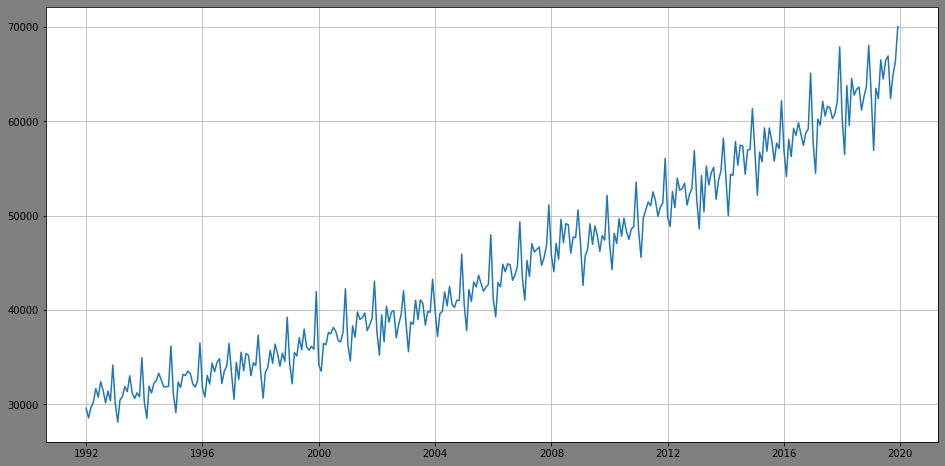

In [9]:
fig, ax = plt.subplots(figsize=(16, 8), facecolor=("grey"))
ax.grid(True, alpha=.9)
ax.plot(df_FoodAndBeverage)

# 4.3  Time Series Decomposition
 

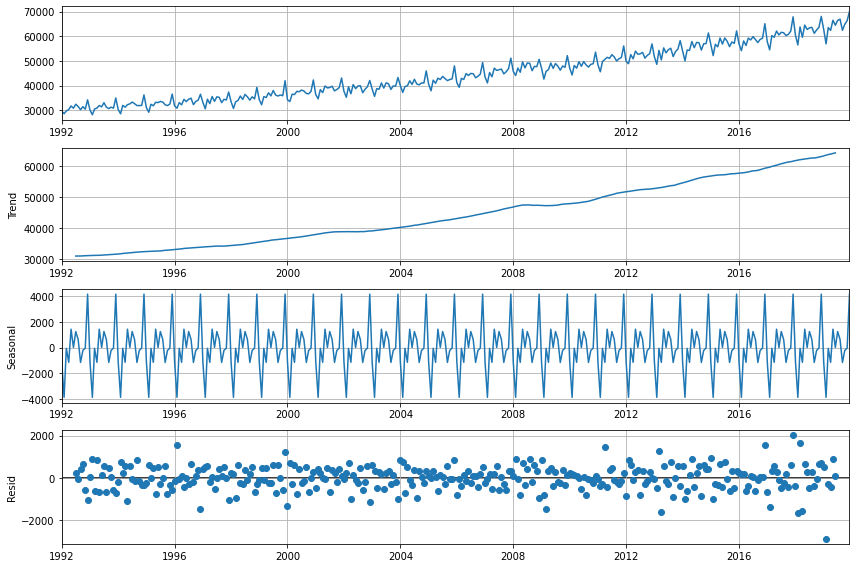

In [10]:
# additive decomposition
plt.rcParams["figure.figsize"]= (12,8)
from statsmodels.tsa.seasonal import seasonal_decompose
add_decompose = seasonal_decompose(df_FoodAndBeverage, model="add")
fig= add_decompose.plot()
plt.show()

# 4.4 plot the trend the dataset

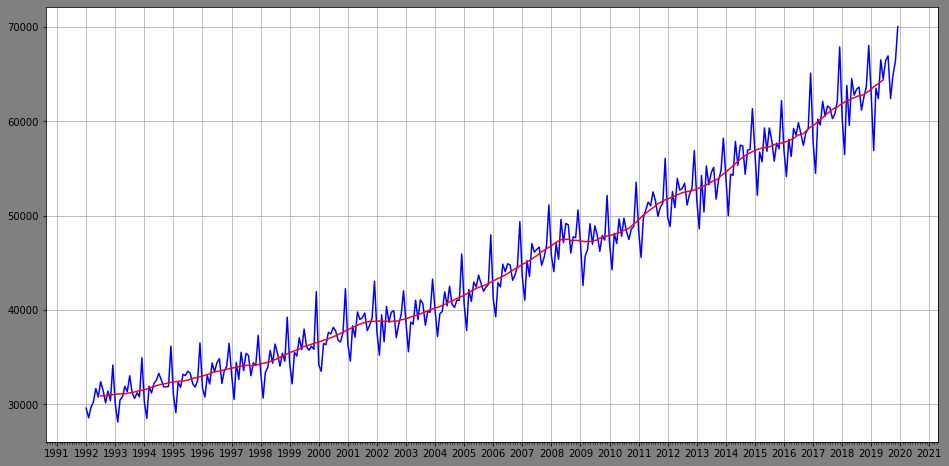

In [11]:
# plt.rcParams['figure.figsize']= (16, 8)

from matplotlib import dates as date
fig, ax = plt.subplots(figsize=(16,8), facecolor=("grey"))
ax.grid(True)


year= date.YearLocator(month=1)
month = date.MonthLocator()
yearformat = date.DateFormatter("%Y")
monthformat = date.DateFormatter("%m")

ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True)
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(yearformat)



plt.plot(df_FoodAndBeverage.index, df_FoodAndBeverage.values, c="blue")
plt.plot(add_decompose.trend.index, add_decompose.trend, c="red")

# 4.5 Plot the seasonal plot of the time series data

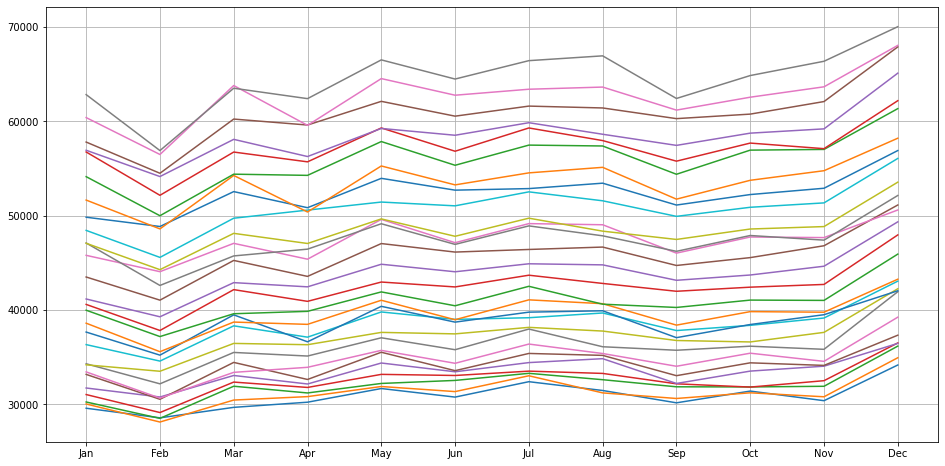

In [12]:
plt.figure(figsize=(16, 8))
plt.grid(True)
# Prepare data

df_seaoanl=df_FoodAndBeverage.copy()
df_seaoanl['year'] = [d.year for d in df_seaoanl.index.date]
df_seaoanl['month'] = [d.strftime('%b') for d in df_seaoanl.index.date]
years = df_seaoanl['year'].unique()
#fig, ax = plt.subplots(figsize=(16,8), facecolor=("grey"))
#ax.facecolor=("grey")

# make the plot
for i, n in enumerate(years):
    if i>=0:
        plt.plot("month","FoodAndBeverage" ,data=df_seaoanl[df_seaoanl["year"]==n])


The plot above show the seasonality of the dataset 

# 4.6. How to test for stationarity?


In [14]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(df_FoodAndBeverage, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')



ADF Statistic: 2.108445177718313
p-value: 0.9987983090931685
Critial Values:
   1%, -3.450886958636161
Critial Values:
   5%, -2.870586350823483
Critial Values:
   10%, -2.5715897843576827


the the p values is greater than 0.05 which implies that there is not stationarity in the dataset. Also since the auto regression model work well on the data without seasonality and trend, I will detrend Moving Average the dataset

# Make the Series Stationary by taking the differencing of log  differencing

<AxesSubplot:xlabel='Month'>

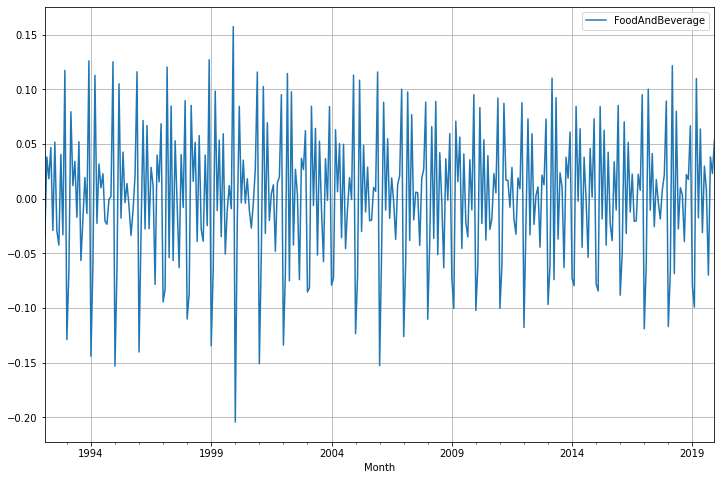

In [20]:
rolling_mean = df_FoodAndBeverage["FoodAndBeverage"].apply(lambda x: np.log(x))
differening_df =pd.DataFrame( rolling_mean - rolling_mean.shift())
differening_df.dropna(inplace=True)
differening_df.plot()


In [21]:
# check the stationary of the data
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
result = adfuller(differening_df, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')



ADF Statistic: -4.333377091809094
p-value: 0.00038866731784347966
Critial Values:
   1%, -3.451148243362826
Critial Values:
   5%, -2.8707010565250752
Critial Values:
   10%, -2.571650950153748


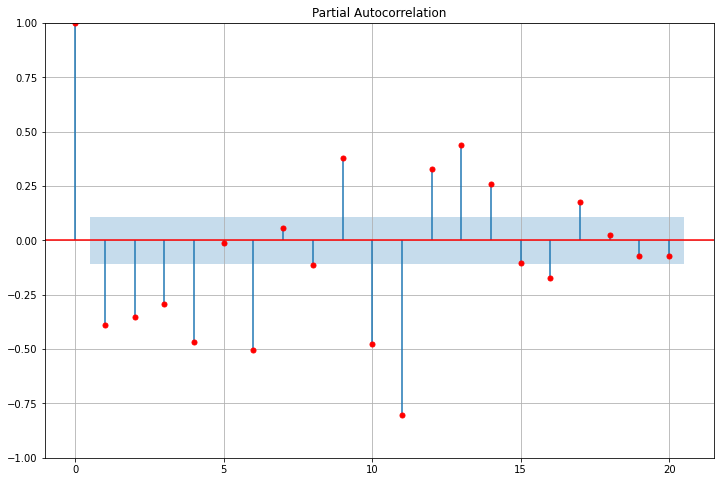

In [23]:
# plot the plot_pacf of the data
from statsmodels.graphics.tsaplots  import plot_acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig=plot_pacf(differening_df, lags=20, color="red",  method ='yw')

# 4.7 Carry out  Granger causality  Test

Granger causality Test is a Test use in statistic to check the forecasbility of the Time Serie.
A p-value lesser than 0.05 implies that the series is good for future forecasbility and p-values greater than 0.05 implies that the series is not useful in forecasting another

In [25]:
from statsmodels.tsa.stattools import grangercausalitytests
dd=df_FoodAndBeverage.reset_index()
dd["record_period"]= pd.to_datetime(dd.Month).dt.month
grangercausalitytests(dd[["FoodAndBeverage", 'record_period']], maxlag=5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.7406  , p=0.0988  , df_denom=332, df_num=1
ssr based chi2 test:   chi2=2.7654  , p=0.0963  , df=1
likelihood ratio test: chi2=2.7540  , p=0.0970  , df=1
parameter F test:         F=2.7406  , p=0.0988  , df_denom=332, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=152.3862, p=0.0000  , df_denom=329, df_num=2
ssr based chi2 test:   chi2=309.4042, p=0.0000  , df=2
likelihood ratio test: chi2=218.9811, p=0.0000  , df=2
parameter F test:         F=152.3862, p=0.0000  , df_denom=329, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=81.1749 , p=0.0000  , df_denom=326, df_num=3
ssr based chi2 test:   chi2=248.7538, p=0.0000  , df=3
likelihood ratio test: chi2=185.7823, p=0.0000  , df=3
parameter F test:         F=81.1749 , p=0.0000  , df_denom=326, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=63.9046 , p=0.0000  

{1: ({'ssr_ftest': (2.74061372248816, 0.09877207767096338, 332.0, 1),
   'ssr_chi2test': (2.765378304317873, 0.09632391309640423, 1),
   'lrtest': (2.754026825233268, 0.09700982891351245, 1),
   'params_ftest': (2.7406137224883604, 0.0987720776709514, 332.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (152.3861842152337, 1.4477622759951277e-47, 329.0, 2),
   'ssr_chi2test': (309.4041673427845, 6.512364835268642e-68, 2),
   'lrtest': (218.98112102289724, 2.810954069594306e-48, 2),
   'params_ftest': (152.38618421523356, 1.4477622759952296e-47, 329.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (81.1749229320826, 3.0390327097940875e-39, 326.0, 3),
   'ssr_chi2test': (248.75382824892793, 1.2171747671342855e-53, 3),
   'lrtest': (185.78232928718626, 4.97325932586491e-40, 3),
   'params_ftest': (81.17492293208134, 3.0390327097974356e-39, 326.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
 

# 5 Built the model

# 5.1 Method 1 : Moving Average

<AxesSubplot:xlabel='Month'>

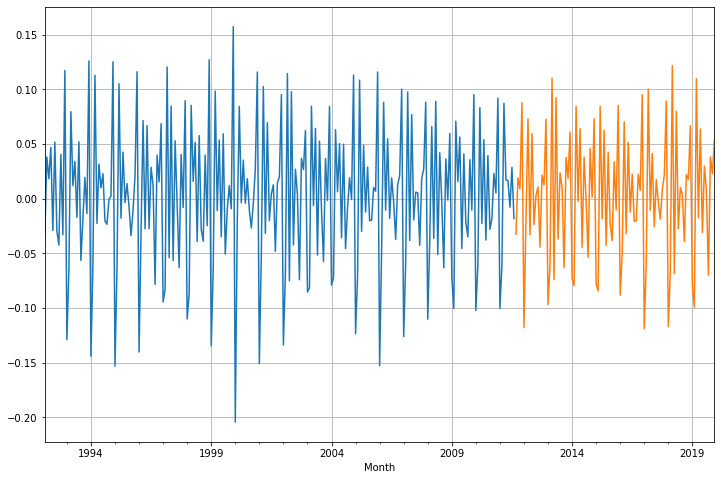

In [28]:
# split the data into train and test
split = len(differening_df) - int(len(differening_df) * .3)

train = differening_df[["FoodAndBeverage"]][:split].rename(columns={"FoodAndBeverage": "FoodAndBeverage_train"})
test = differening_df[["FoodAndBeverage"]][split:].rename(columns={"FoodAndBeverage": "FoodAndBeverage_test"})
train.FoodAndBeverage_train.plot()
test.FoodAndBeverage_test.plot()

In [30]:
train_period= train.to_period("M")
test_period= test.to_period("M")

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<AxesSubplot:xlabel='Month'>

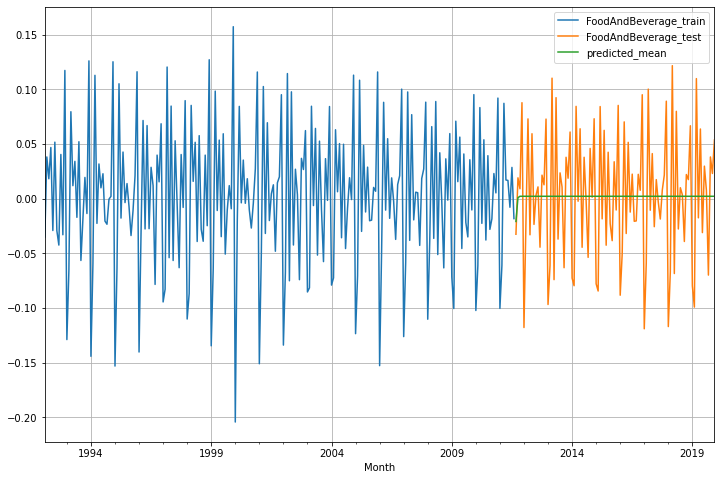

In [32]:
# MA example
from statsmodels.tsa.arima.model import ARIMA
from random import random

# fit model
model = ARIMA(train_period, order=(0, 0, 2))
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(start=pd.to_datetime(test.index[0]),end=pd.to_datetime(test.index[-1]), dynamic=False)



yhat=yhat.to_frame()
train.FoodAndBeverage_train.plot(legend=True)
test.FoodAndBeverage_test.plot(legend=True)
yhat.predicted_mean.plot(legend=True)

# 6 Evaluate the method 1

In [33]:
naive_prediction_rmse = np.sqrt(mean_squared_error(test,yhat ))
naive_prediction_r2 = r2_score(test,yhat )

In [34]:
result= pd.DataFrame([{"Method": "Moving Average", "RMSE":naive_prediction_rmse, "r2":naive_prediction_r2}])
result

,Method,RMSE,r2
0,Moving Average,0.057573,0.002871


# Reference

1. kaggle.com
2. tutorialpoint.com